In [1]:
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Define the path to the Gold folder
gold_path = r"C:\Users\archa\Desktop\Capstone project\Data\Gold"

# File names
files = {
    'counselchat': 'counselchat_gold.csv',
    'facebook': 'facebook_gold.csv',
    'goemotions': 'goemotions_gold.csv'
}

# Load datasets
df_counselchat = pd.read_csv(os.path.join(gold_path, files['counselchat']))
df_facebook = pd.read_csv(os.path.join(gold_path, files['facebook']))
df_goemotions = pd.read_csv(os.path.join(gold_path, files['goemotions']))

In [3]:
emotion_cols = [
    col for col in df_goemotions.columns
    if set(df_goemotions[col].dropna().unique()).issubset({0, 1})
    and df_goemotions[col].dtype in [np.int64, np.int32, np.uint8]
]

emotion_cols

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


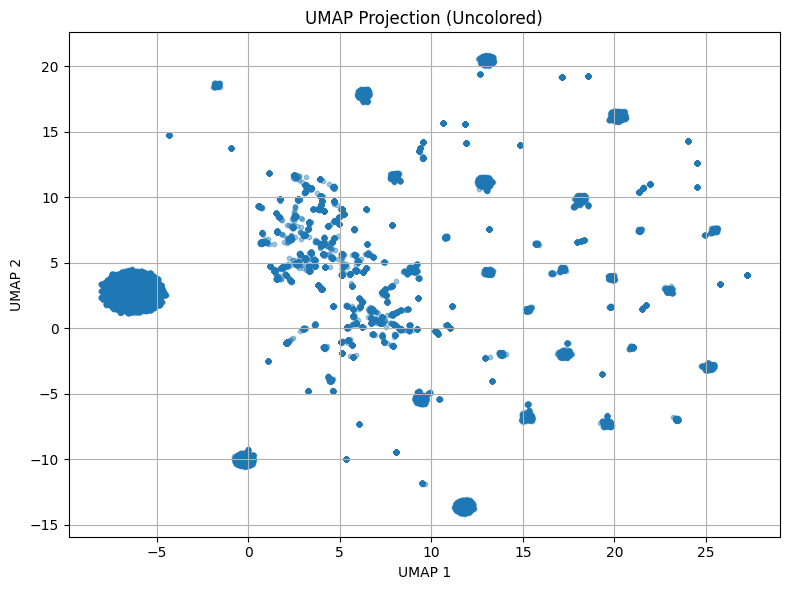

In [4]:
# Apply deterministic UMAP
umap_model = umap.UMAP(random_state=0)  # Fixed seed for consistent layout
umap_embedding = umap_model.fit_transform(df_goemotions[emotion_cols])

# Add UMAP results
df_goemotions['UMAP_1'] = umap_embedding[:, 0]
df_goemotions['UMAP_2'] = umap_embedding[:, 1]

# Plot: UMAP projection (Uncolored)
plt.figure(figsize=(8, 6))
plt.scatter(df_goemotions['UMAP_1'], df_goemotions['UMAP_2'], alpha=0.4, s=10)
plt.title("UMAP Projection (Uncolored)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

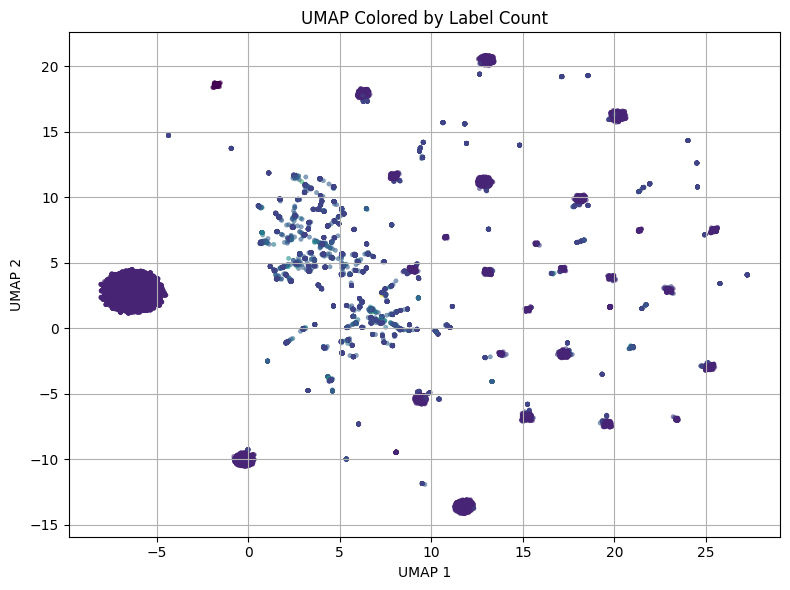

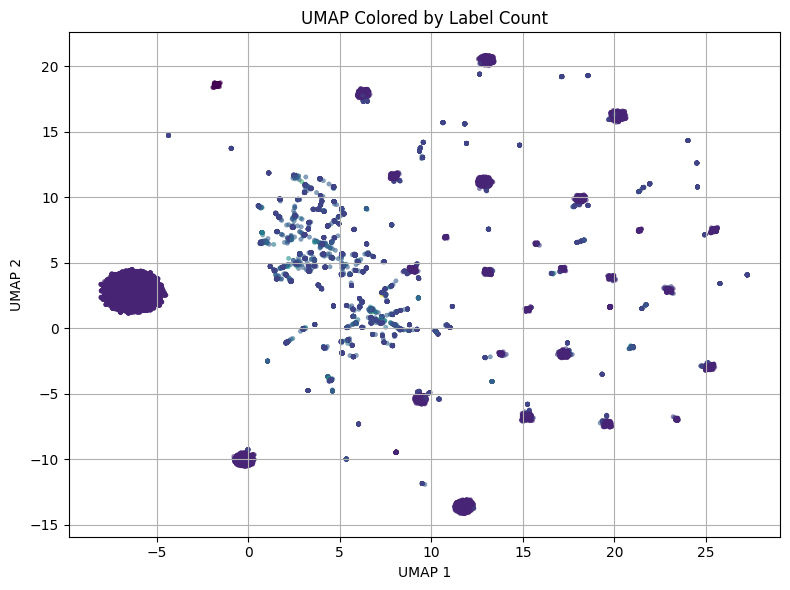

In [5]:
# Plot: UMAP projection colored by label count
df_goemotions['label_count'] = df_goemotions[emotion_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='label_count',
    data=df_goemotions,
    palette='viridis',
    s=10, alpha=0.6, edgecolor=None, legend=False
)
plt.title("UMAP Colored by Label Count")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()# Plot: UMAP projection colored by label count
df_goemotions['label_count'] = df_goemotions[emotion_cols].sum(axis=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP_1', y='UMAP_2',
    hue='label_count',
    data=df_goemotions,
    palette='viridis',
    s=10, alpha=0.6, edgecolor=None, legend=False
)
plt.title("UMAP Colored by Label Count")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Apply KMeans (k=10) on UMAP output
kmeans = KMeans(n_clusters=10, n_init=10)
df_goemotions['cluster'] = kmeans.fit_predict(umap_embedding)

# Dominant emotions per cluster
cluster_emotion_avg = df_goemotions.groupby('cluster')[emotion_cols].mean().T
dominant_emotion_by_cluster = cluster_emotion_avg.idxmax().reset_index()
dominant_emotion_by_cluster.columns = ['Cluster', 'Dominant Emotion']

from IPython.display import display

print("📌 Dominant Emotion per KMeans Cluster:")
display(dominant_emotion_by_cluster)

📌 Dominant Emotion per KMeans Cluster:


,Cluster,Dominant Emotion
0,0,admiration
1,1,sadness
2,2,gratitude
3,3,confusion
4,4,neutral
5,5,disapproval
6,6,approval
7,7,love
8,8,annoyance
9,9,curiosity


In [7]:
# Import required modules (retrying full UMAP + t-SNE workflow)
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

C:\Users\archa\AppData\Local\Temp\ipykernel_25424\731683454.py:27: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


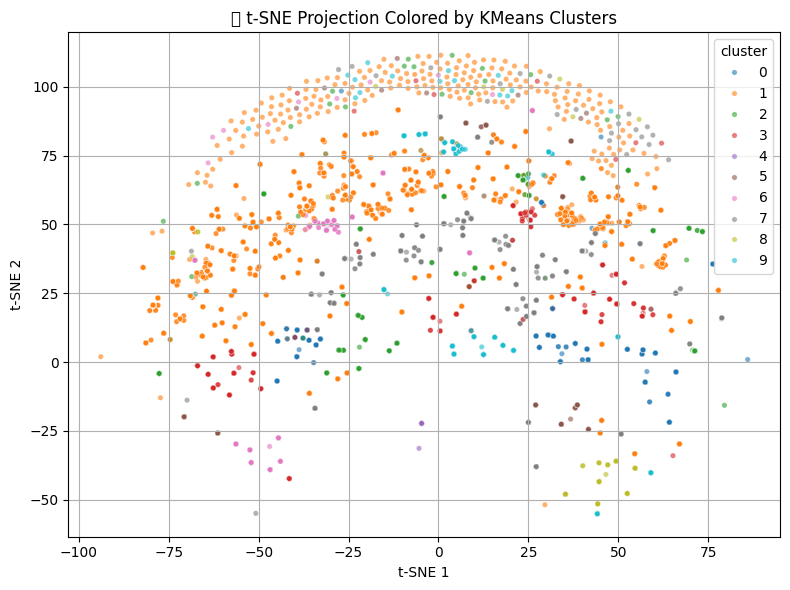

📌 Dominant Emotion per KMeans Cluster:


,Cluster,Dominant Emotion
0,0,admiration
1,1,sadness
2,2,gratitude
3,3,confusion
4,4,neutral
5,5,disapproval
6,6,approval
7,7,love
8,8,annoyance
9,9,curiosity


In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Step 5: t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne_model.fit_transform(df_goemotions[emotion_cols])

# Add t-SNE coordinates to DataFrame
df_goemotions['tSNE_1'] = tsne_embedding[:, 0]
df_goemotions['tSNE_2'] = tsne_embedding[:, 1]

# Step 6: Visualize t-SNE clusters by KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='tSNE_1', y='tSNE_2',
    hue='cluster',
    palette='tab10',
    data=df_goemotions,
    s=15, alpha=0.6
)
plt.title("🔹 t-SNE Projection Colored by KMeans Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display dominant emotions per cluster without ace_tools
print("📌 Dominant Emotion per KMeans Cluster:")
display(dominant_emotion_by_cluster)


In [9]:
# 2. Ensure binary format
df_goemotions[emotion_cols] = df_goemotions[emotion_cols].astype(np.uint8)

# 3. Compute label count per instance
df_goemotions['label_count'] = df_goemotions[emotion_cols].sum(axis=1)

# 4. Count single-label vs multi-label instances
single_label_count = (df_goemotions['label_count'] == 1).sum()
multi_label_count = (df_goemotions['label_count'] > 1).sum()
no_label_count = (df_goemotions['label_count'] == 0).sum()

# Print results
{
    "Total Rows": len(df_goemotions),
    "Single-label Instances": single_label_count,
    "Multi-label Instances": multi_label_count,
    "No-label Instances": no_label_count,
    "Binary Emotion Columns": emotion_cols
}

{'Total Rows': 57732,
 'Single-label Instances': np.int64(46741),
 'Multi-label Instances': np.int64(10148),
 'No-label Instances': np.int64(843),
 'Binary Emotion Columns': ['admiration',
  'amusement',
  'anger',
  'annoyance',
  'approval',
  'caring',
  'confusion',
  'curiosity',
  'desire',
  'disappointment',
  'disapproval',
  'disgust',
  'embarrassment',
  'excitement',
  'fear',
  'gratitude',
  'grief',
  'joy',
  'love',
  'nervousness',
  'optimism',
  'pride',
  'realization',
  'relief',
  'remorse',
  'sadness',
  'surprise',
  'neutral']}

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3: Train-Test Split
# Define features and labels
X = df_goemotions["text"]
y = df_goemotions[emotion_cols].values  # multi-label binary array

# Since stratification is not supported for multi-label arrays directly,
# we fallback to a standard split due to small dataset size (4 rows)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=2,
    ngram_range=(1, 2),
    stop_words='english',
    max_features=15000
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Output stats
{
    "Train Text Shape": X_train_tfidf.shape,
    "Test Text Shape": X_test_tfidf.shape,
    "TF-IDF Vocabulary Size": len(vectorizer.vocabulary_)
}


{'Train Text Shape': (46185, 15000),
 'Test Text Shape': (11547, 15000),
 'TF-IDF Vocabulary Size': 15000}

In [24]:
model = OneVsRestClassifier(
    LogisticRegression(solver='liblinear', class_weight='balanced')
)
model.fit(X_train_tfidf, y_train)


,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None


In [25]:
# ✅ Step 5: Predict probabilities and tune threshold
y_proba = model.predict_proba(X_test_tfidf)

thresholds = np.linspace(0.1, 0.5, 9)
best_thresh = 0.3
best_micro_f1 = 0
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    score = f1_score(y_test, preds, average='micro')
    if score > best_micro_f1:
        best_micro_f1 = score
        best_thresh = t

In [26]:
# ✅ Step 6: Final Prediction with best threshold
y_pred = (y_proba >= best_thresh).astype(int)

# ✅ Step 7: Evaluation Metrics
report = classification_report(y_test, y_pred, target_names=emotion_cols, output_dict=True, zero_division=0)
subset_accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')
f1_scores = [report[label]["f1-score"] for label in emotion_cols]

C:\Users\archa\AppData\Local\Temp\ipykernel_25424\1835247671.py:8: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\archa\Desktop\Capstone project\capstone\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


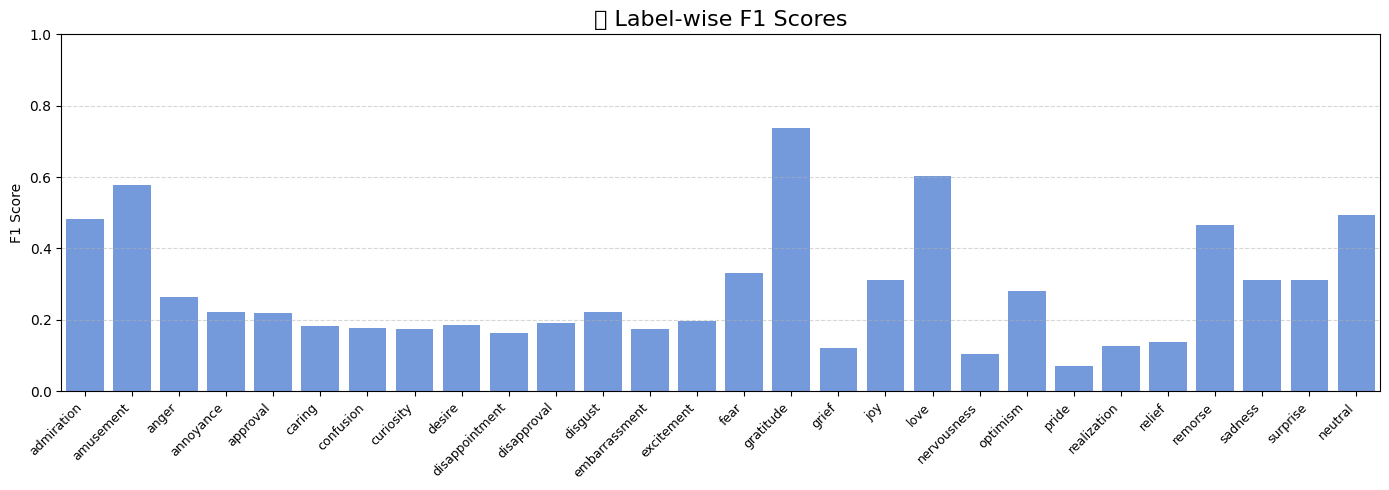

In [27]:
plt.figure(figsize=(14, 5))
sns.barplot(x=emotion_cols, y=f1_scores, color='cornflowerblue')
plt.title("🔹 Label-wise F1 Scores", fontsize=16)
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [28]:
y_proba = model.predict_proba(X_test_tfidf)

def precision_at_k(y_true, y_scores, k):
    top_k_preds = np.argsort(y_scores)[::-1][:k]
    true_labels = np.where(y_true == 1)[0]
    correct = len(set(top_k_preds).intersection(set(true_labels)))
    return correct / k if k > 0 else 0

def mean_precision_at_k(y_true, y_scores, k):
    return np.mean([precision_at_k(y_true[i], y_scores[i], k) for i in range(len(y_true))])


In [29]:
topk_results = {}
for k in [1, 3, 5]:
    if k <= y_proba.shape[1]:
        topk_results[f"Precision@{k}"] = round(mean_precision_at_k(y_test, y_proba, k), 2)

# Print Summary
results_summary = {
    "Subset Accuracy": round(subset_accuracy, 2),
    "Macro F1": round(macro_f1, 2),
    "Micro F1": round(micro_f1, 2),
    **topk_results
}
print("📊 Evaluation Summary:", results_summary)


📊 Evaluation Summary: {'Subset Accuracy': 0.07, 'Macro F1': 0.28, 'Micro F1': 0.31, 'Precision@1': np.float64(0.36), 'Precision@3': np.float64(0.22), 'Precision@5': np.float64(0.16)}


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [62]:
# Make sure 'text' column exists
text_data = df_goemotions["text"].fillna("")

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words='english',
    max_features=3000
)

X_tfidf = tfidf_vectorizer.fit_transform(text_data)


In [63]:
# Define number of topics
n_topics = 10

# Train NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X_tfidf)   # Document-topic matrix
H = nmf_model.components_              # Topic-word matrix


In [64]:
feature_names = tfidf_vectorizer.get_feature_names_out()

def display_topics(H, feature_names, top_words=10):
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"🔹 Topic #{topic_idx + 1}: {', '.join(top_features)}")

display_topics(H, feature_names)


🔹 Topic #1: just, want, say, maybe, said, let, saying, mean, ll, trying
🔹 Topic #2: love, hate, gotta, username, damn, man, haha, guys, amazing, absolutely
🔹 Topic #3: like, looks, feel, sounds, look, feels, guy, sound, kinda, doesn
🔹 Topic #4: thanks, ll, man, sharing, ok, appreciate, cool, know, ah, advice
🔹 Topic #5: thank, ll, appreciate, try, sharing, cool, advice, awesome, kind, words
🔹 Topic #6: good, luck, job, man, know, pretty, thing, damn, idea, hope
🔹 Topic #7: don, know, think, want, care, understand, worry, didn, believe, need
🔹 Topic #8: oh, yeah, man, sorry, god, wow, didn, look, boy, know
🔹 Topic #9: lol, funny, actually, know, yeah, said, did, thought, exactly, right
🔹 Topic #10: really, people, think, time, ve, bad, did, got, right, hope


In [65]:
df_goemotions["topic"] = W.argmax(axis=1)


C:\Users\archa\AppData\Local\Temp\ipykernel_25424\884274851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_goemotions, x="topic", palette="tab10")


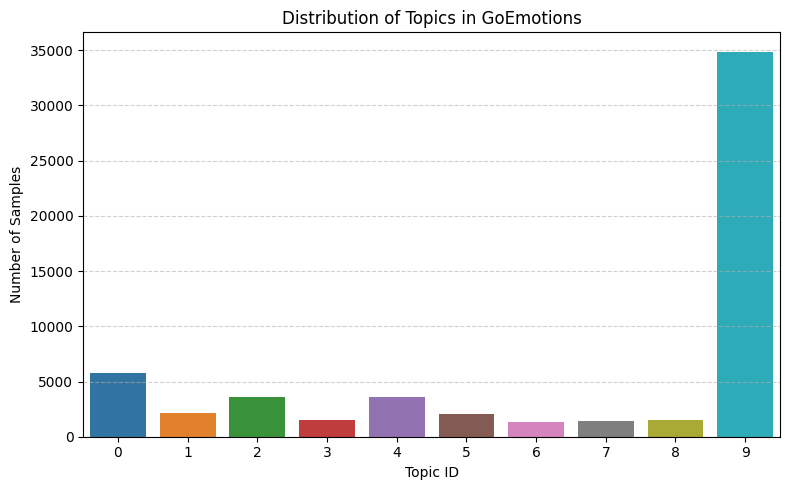

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_goemotions, x="topic", palette="tab10")
plt.title("Distribution of Topics in GoEmotions")
plt.xlabel("Topic ID")
plt.ylabel("Number of Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [66]:
import umap
embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(nmf_topics)

plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dedup_df['dominant_topic'], cmap='tab10', s=10, alpha=0.7)
plt.title("UMAP Projection of Topic Distributions")
plt.colorbar(label="Topic #")
plt.show()

NameError: name 'nmf_topics' is not defined